## Resultados Experimento RNN SST Región Niño 3.4

**PROYECTO:** SISTEMA PARA EL SEGUIMIENTO DE ECOSISTEMAS VENEZOLANOS \
**AUTOR:** Javier Martinez

Directorio de trabajo

In [2]:
import os

print('> Directorio actual: ', os.getcwd())  
os.chdir('../')
print('> Directorio actual: ', os.getcwd()) 

> Directorio actual:  /media/javier/Compartida/doctorado/ssev-analytics/sst_nino3.4
> Directorio actual:  /media/javier/Compartida/doctorado/ssev-analytics


In [3]:
from utils.MONGO import CONEXION
from datetime import datetime
import pandas as pd
import numpy as np
import pickle

from tensorflow import keras

from utils.UTILS import *
from utils.NINO_UTILS import *

In [2]:
import locale

# Cambiando sistema horario
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

# Resultados de modelos

In [4]:
# Ruta de esperimentos
DIR = './sst_nino34/experiments'
experimentos = [x for x in os.listdir(DIR) if x.find('recurrent_sst')!=-1 ]

# Buscando archivos summary
summary = []
for file in experimentos:
    summary.append([f'{DIR}/{file}/{x}' for x in os.listdir(f'{DIR}/{file}') if x.find('summary')!=-1 ][0])

summary_file = list(map(lambda x: pd.read_csv(x), summary))
summary_pd = pd.concat(summary_file).sort_values(['prediction_order','auto_order'])

summary_pd.head()

,epocas,prediction_order,auto_order,training_mse,training_rmse,training_mae,trainig_mape,trainig_r,validation_mse,validation_rmse,validation_mae,validation_mape,test_mse,test_rmse,test_mae,test_mape
0,46,12,24,0.002493,0.049930,0.039710,0.768277,0.931462,0.189981,0.036093,0.164590,0.624067,0.271537,0.073732,0.228754,0.867126
0,37,12,72,0.002564,0.050634,0.040970,0.799884,0.928074,0.481914,0.232242,0.451368,1.721296,1.538912,2.368249,1.442374,5.529332
0,100,12,96,0.001328,0.036438,0.029035,0.552455,0.964175,0.349377,0.122064,0.295216,1.124509,0.570086,0.324998,0.492101,1.878519
0,100,12,120,0.001085,0.032945,0.026316,0.442968,0.975738,0.345226,0.119181,0.270404,1.024111,0.525889,0.276559,0.390685,1.474968
0,100,12,144,0.001030,0.032094,0.025282,0.501089,0.971006,0.427778,0.182994,0.303450,1.142212,0.663006,0.439576,0.474186,1.784523


In [4]:
# Guardando resumen de experimentos
summary_pd.to_csv(f'./sst_nino34/summary/summary_rnn_sst.csv')

Cargarndo predicciones del modelo seleccionado

In [5]:
prediction_order = 24
auto_order = 240

pd_summary = pd.read_pickle(f'{DIR}/recurrent_sst_{prediction_order}_{auto_order}/predicciones_{prediction_order}_{auto_order}.pkl')
pd_summary['periodo'] = pd_summary.index
pd_summary['mes'] =  pd_summary['periodo'].dt.strftime('%B')
pd_summary['nino34_mean'] = pd_summary.apply(lambda x: x.prediction_nino34_mean if np.isnan(x.nino34_mean) else x.nino34_mean,1)
pd_summary['year'] = pd_summary.index.strftime('%Y').astype(int)
pd_summary['month'] = pd_summary.index.strftime('%m').astype(int)
pd_summary['anomalia_periodo'] = pd_summary['year'].apply(lambda x: anomalia_periodo(int(x)) ).astype(int)

pd_summary['time'] = pd_summary.periodo.apply(lambda x: datetime.toordinal(x))
pd_summary['time_actualizacion'] = int(datetime.today().toordinal())

pd_summary.head()

,prediction,sst,type,nino34_mean,prediction_nino34_mean,periodo,mes,year,month,anomalia_periodo,time,time_actualizacion
1982-07-01,0.656678,0.682003,training,27.66,27.525191,1982-07-01,julio,1982,7,7,723727,738418
1982-08-01,0.643480,0.666989,training,27.58,27.455202,1982-08-01,agosto,1982,8,7,723758,738418
1982-09-01,0.738494,0.782225,training,28.20,27.963094,1982-09-01,septiembre,1982,9,7,723789,738418
1982-10-01,0.843684,0.871520,training,28.69,28.536348,1982-10-01,octubre,1982,10,7,723819,738418
1982-11-01,0.880568,0.857046,training,28.61,28.740124,1982-11-01,noviembre,1982,11,7,723850,738418


Cargando imagenes

In [35]:
path_history = [f'{DIR}/recurrent_sst_{prediction_order}_{auto_order}/{x}' for x in os.listdir(f'{DIR}/recurrent_sst_{prediction_order}_{auto_order}') if x.find('history')!=-1 ]

with open(path_history[0], 'rb') as f:
    history = pickle.load(f)

In [37]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
        #'figure.figsize': (15, 10),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}

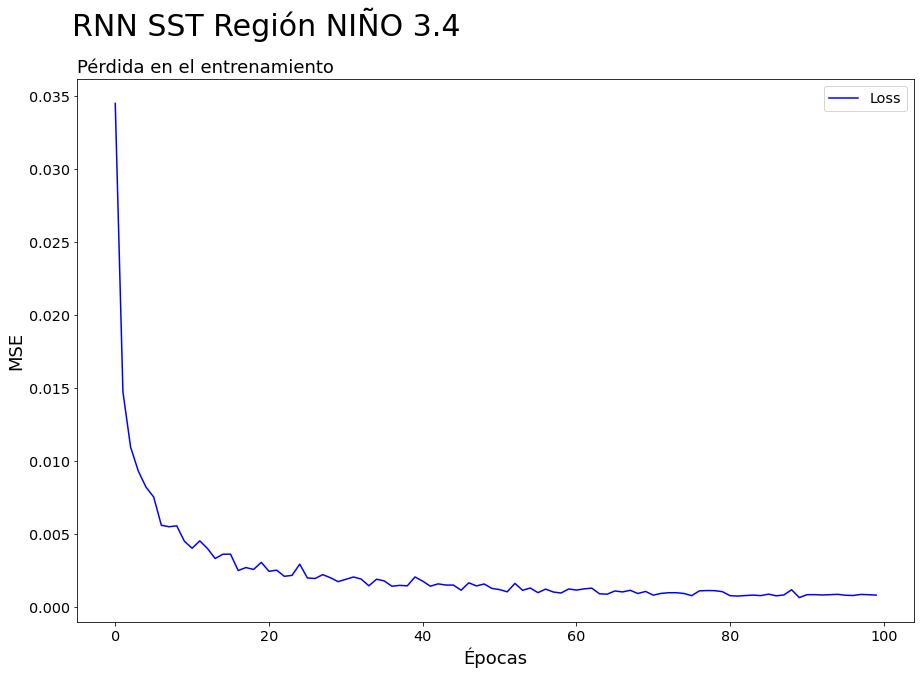

In [51]:
title = 'RNN SST Región NIÑO 3.4'

loss = history["loss"]
val_loss = history["loss"]
epochs = range(len(loss))
plt.figure(figsize=(15,10))
pylab.rcParams.update(params)
plt.plot(epochs, loss, "b", label="Loss")

plt.title('Pérdida en el entrenamiento',loc='left',fontsize=18)
plt.suptitle(title,ha='left',fontsize=30,x=0.12)
plt.xlabel("Épocas",fontsize=18)
plt.ylabel("MSE",fontsize=18)
plt.legend()

plt.savefig(f'./sst_nino34/figures/nino34/loss_rnn_model_nino34.png')
plt.show()

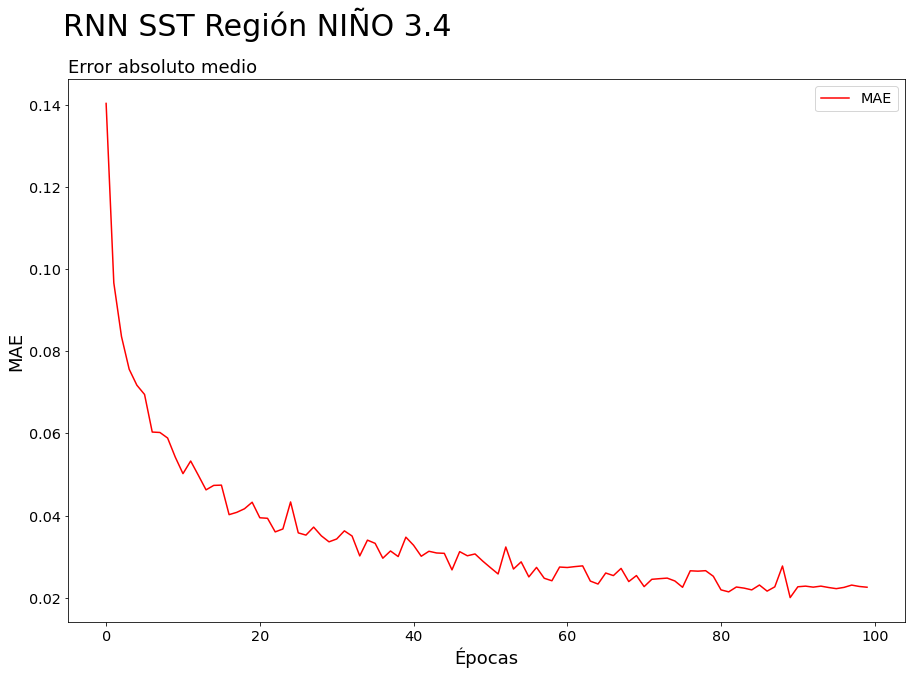

In [50]:
title = 'RNN SST Región NIÑO 3.4'
loss = history["loss"]
val_loss = history["mean_absolute_error"]
epochs = range(len(loss))
plt.figure(figsize=(15,10))
pylab.rcParams.update(params)
plt.plot(epochs, val_loss, "r", label="MAE")

plt.title('Error absoluto medio',loc='left',fontsize=18)
plt.suptitle(title,ha='left',fontsize=30,x=0.12)
plt.xlabel("Épocas",fontsize=18)
plt.ylabel("MAE",fontsize=18)
plt.legend()

plt.savefig(f'./sst_nino34/figures/nino34/mae_rnn_model_nino34.png')
plt.show()

In [45]:
pd_summary.type.unique()

array(['training', '', 'prediction'], dtype=object)

In [49]:
figura = graf_sst(pd_summary[pd_summary.type=='training'],
                  pd_summary[pd_summary.type==''],
                  pd_summary[pd_summary.type=='prediction'],
                  'nino34_mean',
                  'prediction_nino34_mean'
                )


figura.write_image(f'./sst_nino34/figures/nino34/pronostico_sstt.png')
figura.show()

# Pronóstico ONI

### Conexion MongoDB

In [7]:
# Creando la conexión con MongoDB
db = CONEXION.conexion()
db.list_collection_names()

['meteorological', 'SSTNino34']

### Descargando la Información SST NIÑO3.4

In [8]:
# Fecha actual
time = datetime.today().toordinal()

# Realizando consulta
sst_data = db.SSTNino34.find({"time":{"$lte":time}})

# Generando pandas dataframe
data_pandas = pd.DataFrame([file for file in sst_data])
data_pandas['periodo'] = data_pandas.time.apply(lambda x: datetime.fromordinal(x))
data_pandas['mes_year'] =  data_pandas['periodo'].dt.strftime('%B-%Y')
data_pandas.index = pd.to_datetime(data_pandas.periodo)
data_pandas.head()

,_id,year,month,nino34_mean,climatologica,anomalias,mes,time,time_actualizacion,periodo,mes_year
periodo,,,,,,,,,,,
2022-06-01,62e6d1d870bebdf1983a27a9,2022,6,26.96,27.73,-0.77,junio,738307,738367,2022-06-01,junio-2022
2022-05-01,62e6d1d870bebdf1983a27a8,2022,5,26.82,27.94,-1.12,mayo,738276,738367,2022-05-01,mayo-2022
2022-04-01,62e6d1d870bebdf1983a27a7,2022,4,26.71,27.83,-1.12,abril,738246,738367,2022-04-01,abril-2022
2022-03-01,62e6d1d870bebdf1983a27a6,2022,3,26.32,27.29,-0.98,marzo,738215,738367,2022-03-01,marzo-2022
2022-02-01,62e6d1d870bebdf1983a27a5,2022,2,25.87,26.76,-0.90,febrero,738187,738367,2022-02-01,febrero-2022


In [9]:
data_pandas.index.min()

Timestamp('1950-01-01 00:00:00')

Función par ael cálculo de los periodos base

In [10]:
# Data de anomalias climaticas
pd_perioodo_anomalias = periodo_anomalias_climaticas(data_pandas)
pd_perioodo_anomalias.head()

,date_init,date_end,anomalia_periodo,month,climatologica,range_init,range_end
0,1950,1955,1,1,26.18,1936,1965
1,1950,1955,1,2,26.39,1936,1965
2,1950,1955,1,3,26.95,1936,1965
3,1950,1955,1,4,27.39,1936,1965
4,1950,1955,1,5,27.56,1936,1965


Agregando periodos base y calculando el ONI

In [11]:
# incorporando anomalias al pronostico
pd_oni = pd.merge(pd_summary,
                 pd_perioodo_anomalias,
                 on=['month','anomalia_periodo'],
                 how='left')[['periodo','year','month','nino34_mean','climatologica','mes','time','type','time_actualizacion']]

pd_oni.index = pd.to_datetime(pd_oni.periodo)
pd_oni.head()

,periodo,year,month,nino34_mean,climatologica,mes,time,type,time_actualizacion
periodo,,,,,,,,,
1982-07-01,1982-07-01,1982,7,27.66,27.02,julio,723727,training,738418
1982-08-01,1982-08-01,1982,8,27.58,26.64,agosto,723758,training,738418
1982-09-01,1982-09-01,1982,9,28.20,26.56,septiembre,723789,training,738418
1982-10-01,1982-10-01,1982,10,28.69,26.53,octubre,723819,training,738418
1982-11-01,1982-11-01,1982,11,28.61,26.52,noviembre,723850,training,738418


In [12]:
# Información restante
# Información perdida en la estimación por auto orden
pd_sst_restantes = data_pandas[data_pandas.index<pd_oni.index.min()].copy()
pd_sst_restantes['type'] = 'training'
pd_sst_restantes = pd_sst_restantes[list(pd_oni)]
pd_sst_restantes.head()

,periodo,year,month,nino34_mean,climatologica,mes,time,type,time_actualizacion
periodo,,,,,,,,,
1982-06-01,1982-06-01,1982,6,28.26,27.46,junio,723697,training,738367
1982-05-01,1982-05-01,1982,5,28.39,27.66,mayo,723666,training,738367
1982-04-01,1982-04-01,1982,4,28.03,27.59,abril,723636,training,738367
1982-03-01,1982-03-01,1982,3,27.42,27.17,marzo,723605,training,738367
1982-02-01,1982-02-01,1982,2,26.60,26.75,febrero,723577,training,738367


In [13]:
pd_oni = pd.concat([pd_sst_restantes,pd_oni]).sort_index()

# Calculando ONI
pd_oni['anomalias'] = pd_oni['nino34_mean'] - pd_oni['climatologica']
pd_oni['oni'] =  pd_oni.anomalias.rolling(min_periods=1, window=3, center=True).mean()

pd_oni.head()

,periodo,year,month,nino34_mean,climatologica,mes,time,type,time_actualizacion,anomalias,oni
periodo,,,,,,,,,,,
1950-01-01,1950-01-01,1950,1,24.56,26.18,enero,711858,training,738367,-1.62,-1.470000
1950-02-01,1950-02-01,1950,2,25.07,26.39,febrero,711889,training,738367,-1.32,-1.336667
1950-03-01,1950-03-01,1950,3,25.88,26.95,marzo,711917,training,738367,-1.07,-1.163333
1950-04-01,1950-04-01,1950,4,26.29,27.39,abril,711948,training,738367,-1.10,-1.180000
1950-05-01,1950-05-01,1950,5,26.19,27.56,mayo,711978,training,738367,-1.37,-1.070000


In [14]:
print(pd_oni.index.min())
print(pd_oni.index.max())

1950-01-01 00:00:00
2024-06-01 00:00:00


In [21]:
pd_oni.shape

(894, 11)

In [52]:
fig = forecast_oni_grap(pd_oni)
fig.write_image('./sst_nino3.4/figures/nino34/pronostico_oni.png')
fig.show()

# Guardando información en MongoDB

In [16]:
import json

# Mongo coleccion
documentos = json.loads( pd_oni.drop(columns=['periodo'], axis=1).to_json(orient="records") )

documentos[-1]

{'year': 2024,
 'month': 6,
 'nino34_mean': 28.2297027698,
 'climatologica': 27.73,
 'mes': 'junio',
 'time': 739038,
 'type': 'prediction',
 'time_actualizacion': 738418,
 'anomalias': 0.4997027698,
 'oni': 0.3484414152}

In [17]:
# insertando coleccion
coleccion = db['estimateSSTNino34']

In [27]:
# Insertando documentos
for doc in documentos:
  coleccion.update_one({"time":doc.get('time') }, {"$set":doc}, upsert = True )